In [2]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
markers=[ '--', '-.', ':', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted']

colors= ["b", "orange", "r", "c", "m", "grey", "black", "violet", "skyblue", "brown", "darkgoldenrod", "khaki", "cornflowerblue", "lightpink", "lime"]

noises=[0.1, 0.2, 0.3, 0.4, 0.15, 0.24, 0.34, 0.44, 0.27, 0.37, 0, 0.13, 0.41, 0.22, 0.33, 0.2]

In [4]:
df = pd.read_csv("upscaling.csv")
ids = df["Userid"].unique()

print(ids)

headers = []
for col in df:
    headers.append(col)

print(headers)

[158455 313449 351278 446875 453897 483491 494149 547832 738648 773684
 873115 931499 953571]
['Userid', 'Still Morning', 'Still Afternoon', 'Still Evening', 'Still Night', 'Running Morning', 'Running Afternoon', 'Running Evening', 'Running Night', 'ADHD', 'ADHDScore', 'Survey Dates']


In [5]:
dfADHD = df[df["ADHD"]==1]

dfADHD


dfNone = df[df["ADHD"]==0]


dfNone


,Userid,Still Morning,Still Afternoon,Still Evening,Still Night,Running Morning,Running Afternoon,Running Evening,Running Night,ADHD,ADHDScore,Survey Dates
16,446875,81.572526,185.382393,288.533507,382.272729,0.000000,3.529145,8.551033,0.000000,0,20,2022-04-22
17,446875,80.761471,198.182312,252.219443,323.696669,0.000000,6.438721,11.079610,0.000000,0,21,2022-04-29
18,446875,75.225371,117.194374,188.330329,339.030595,0.000000,5.257786,7.272476,0.000000,0,21,2022-05-06
19,446875,36.197861,111.517203,171.757908,192.000092,0.900075,3.038222,1.904383,0.000000,0,18,2022-05-13
20,446875,27.198519,118.874119,195.781902,346.896457,0.186902,5.952119,9.226186,0.000000,0,18,2022-05-20
21,446875,87.170900,148.990524,212.507848,418.395493,1.615919,2.628998,8.682886,0.000000,0,18,2022-05-27
22,446875,69.775953,126.628075,174.489333,291.591486,1.636494,3.847425,5.907069,1.666667,0,18,2022-06-03
23,446875,143.400880,151.418047,246.596070,281.164297,1.070330,0.000000,12.185357,48.000000,0,18,2022-06-10
42,547832,80.789826,164.253957,273.439307,296.846988,0.000000,6.720764,15.015810,65.714286,0,30,2022-04-21
43,547832,86.706610,169.471526,268.493150,310.743857,0.000000,7.002979,16.640498,32.857143,0,25,2022-04-28


In [6]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px

In [7]:
dfADHD['Userid'] = dfADHD['Userid'].astype('category')

#tilt the date on the x-axis!!!!

fig = px.scatter(dfADHD, 
                 x = 'Survey Dates',
                 y = 'Still Morning',
                 template = 'simple_white', 
                hover_name = 'Userid', 
                 color = 'Userid',
                 labels = {"Still Morning": "Morning Still (min)"},
                 title= "Participants with ADHD Morning Still Time")

fig.show()

# fig.update_xaxes(tickangle = 30)

# fig.show()

C:\Users\Ying Zhu\AppData\Local\Temp\ipykernel_25696\2326284141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfADHD['Userid'] = dfADHD['Userid'].astype('category')


In [8]:
fig = px.scatter(dfADHD, 
                 x = 'Survey Dates',
                 y = 'Running Night',
                 template = 'simple_white', 
                hover_name = 'Userid', 
                 color = 'Userid',
                 labels = {"Running Night": "Night Running (min)"},
                 title= "Participants with ADHD Night Running Time")

fig.show()

# fig.update_xaxes(tickangle = 30)

# fig.show()

In [9]:
dfNone['Userid'] = dfNone['Userid'].astype('category')

#tilt the date on the x-axis!!!!

fig = px.scatter(dfNone, 
                 x = 'Survey Dates',
                 y = 'Still Morning',
                 template = 'simple_white', 
                hover_name = 'Userid', 
                 color = 'Userid',
                 labels = {"Still Morning": "Morning Still (min)"},
                 title= "Participants without ADHD Morning Still Time")

fig.show()

# fig.update_xaxes(tickangle = 30)

# fig.show()

C:\Users\Ying Zhu\AppData\Local\Temp\ipykernel_25696\3520973971.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
fig = px.scatter(dfNone, 
                 x = 'Survey Dates',
                 y = 'Running Night',
                 template = 'simple_white', 
                hover_name = 'Userid', 
                 color = 'Userid',
                 labels = {"Running Night": "Night Running (min)"},
                 title= "Participants without ADHD Night Running Time")

fig.show()

# fig.update_xaxes(tickangle = 30)

# fig.show()

In [11]:
dfPivot = dfADHD.melt(id_vars = ['Userid','Survey Dates'], value_vars = ['Still Morning','Still Afternoon', 'Still Evening', 'Still Night', 'Running Morning', 'Running Afternoon', 'Running Evening', 'Running Night'], var_name = 'Activity Kind and When', value_name = 'Duration Time')

dfPivot

,Userid,Survey Dates,Activity Kind and When,Duration Time
0,158455,2022-11-01,Still Morning,68.571429
1,158455,2022-11-11,Still Morning,24.000000
2,158455,2022-12-09,Still Morning,34.285714
3,158455,2022-12-22,Still Morning,42.857143
4,313449,2022-04-17,Still Morning,73.471356
...,...,...,...,...
451,953571,2022-04-29,Running Night,0.000000
452,953571,2022-05-20,Running Night,57.500000
453,953571,2022-05-28,Running Night,0.000000
454,953571,2022-06-10,Running Night,0.000000


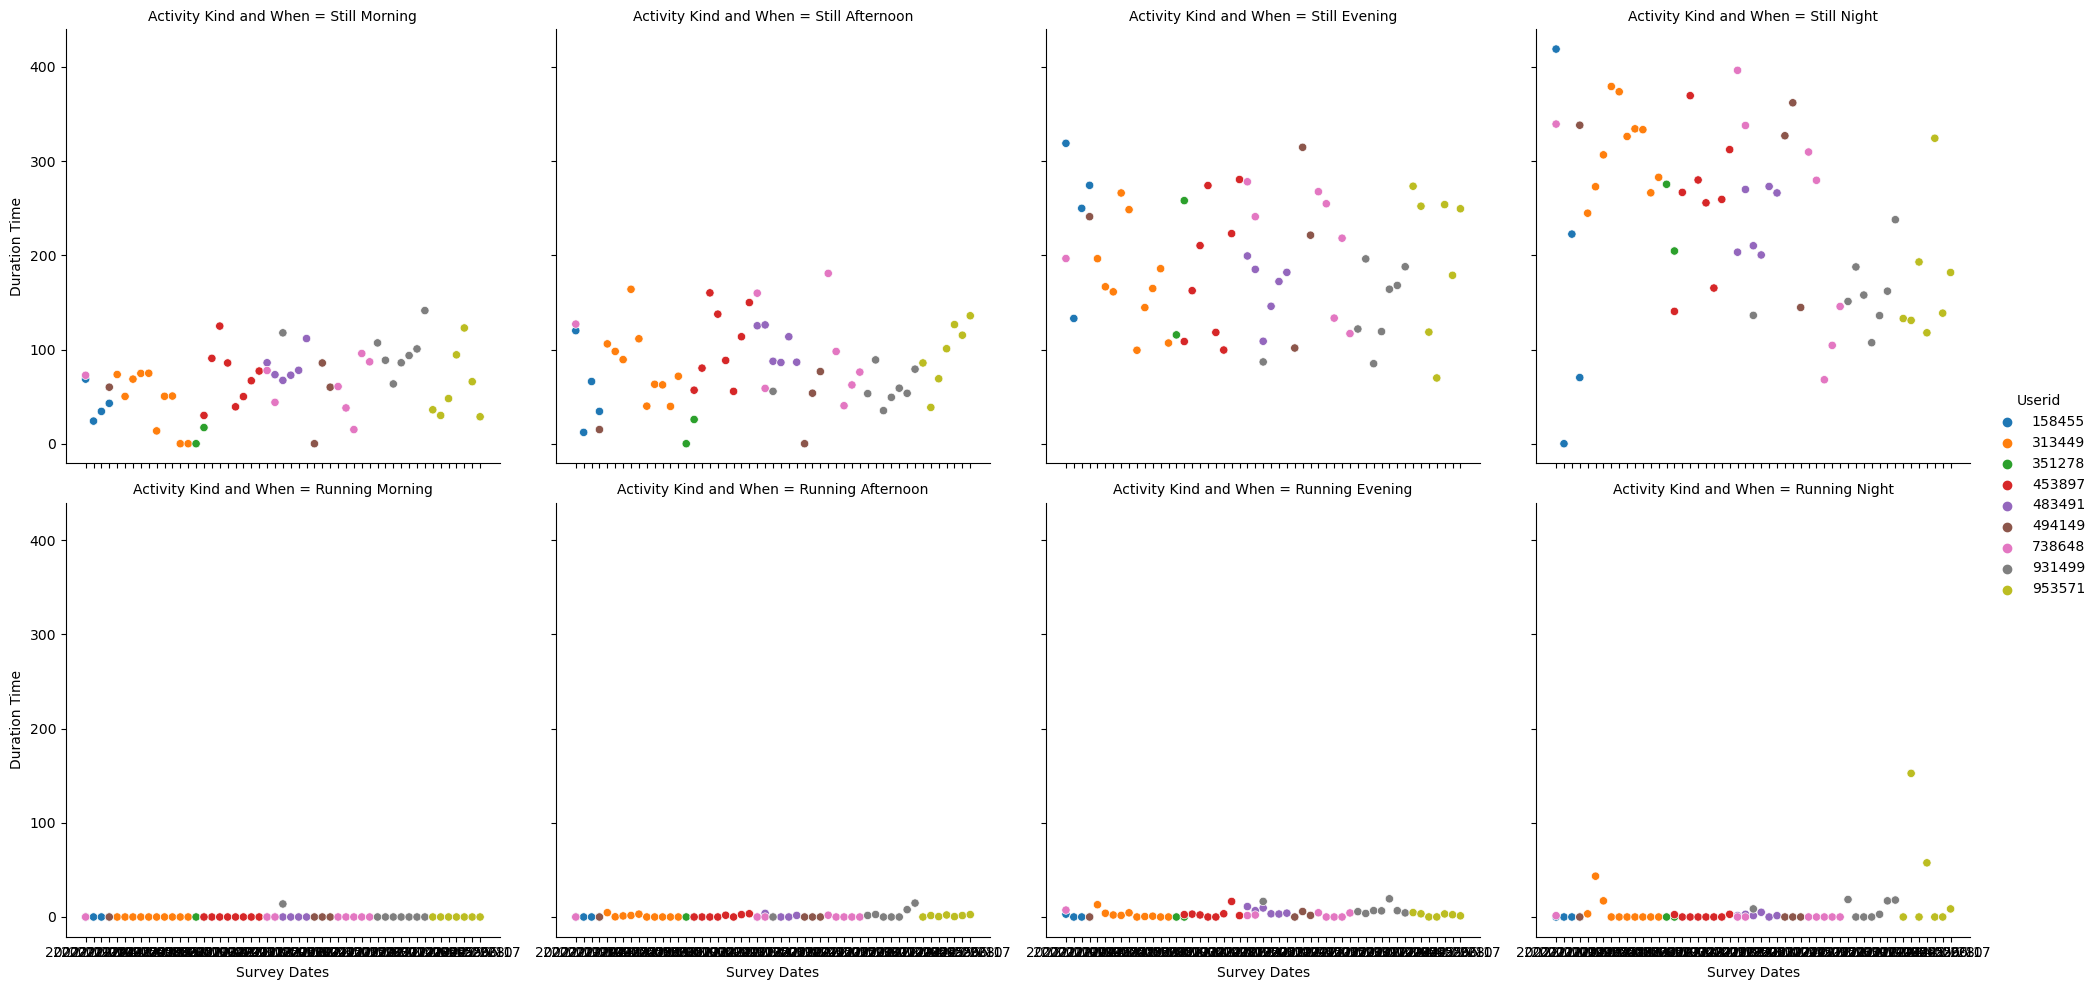

In [12]:
dfPivot['Userid'] = dfPivot['Userid'].astype('category')

g = sns.relplot(kind = 'scatter',
            x = 'Survey Dates',
            y = 'Duration Time',
            hue = 'Userid',
            col = 'Activity Kind and When', 
            col_wrap = 4,
            data = dfPivot)

g

In [13]:
dfPivot = dfNone.melt(id_vars = ['Userid','Survey Dates'], value_vars = ['Still Morning','Still Afternoon', 'Still Evening', 'Still Night', 'Running Morning', 'Running Afternoon', 'Running Evening', 'Running Night'], var_name = 'Activity Kind and When', value_name = 'Duration Time')

dfPivot

dfPivot['Userid'] = dfPivot['Userid'].astype('category')

sns.relplot(kind = 'scatter',
            x = 'Survey Dates',
            y = 'Duration Time',
            hue = 'Userid',
            col = 'Activity Kind and When', 
            col_wrap = 4,
            data = dfPivot)

